In [2]:
!pip install numpy

In [3]:
!pip install scipy

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e-06 ...  9.990e-04  1.000e-03]
        y: [[ 0.000e+00  5.609e+04 ... -4.508e-07 -4.178e-07]
            [ 0.000e+00  2.883e-02 ...  2.000e+00  2.000e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 746
     njev: 0
      nlu: 0
[ 5.60380327e+10  5.20489533e+10  4.38385968e+10  3.53218867e+10
  2.68047408e+10  1.85181341e+10  1.06508636e+10  3.37995458e+09
 -3.15995779e+09 -8.87701147e+09 -1.36855430e+10 -1.75307052e+10
 -2.04382740e+10 -2.24552766e+10 -2.36373253e+10 -2.40248893e+10
 -2.36595021e+10 -2.26417974e+10 -2.11068045e+10 -1.91876141e+10
 -1.69712720e+10 -1.45162582e+10 -1.19127489e+10 -9.26195269e+09
 -6.65986759e+09 -4.18585188e+09 -1.87617140e+09  2.28494837e+08
  2.08323940e+09  3.67078900e+09  4.97486746e+09  5.99277117e+09
  6.72827542e+09  7.18134790e+09  7.37155303e+09  7.33476645e+09
  7.10664979e+09  6.71358177e+0

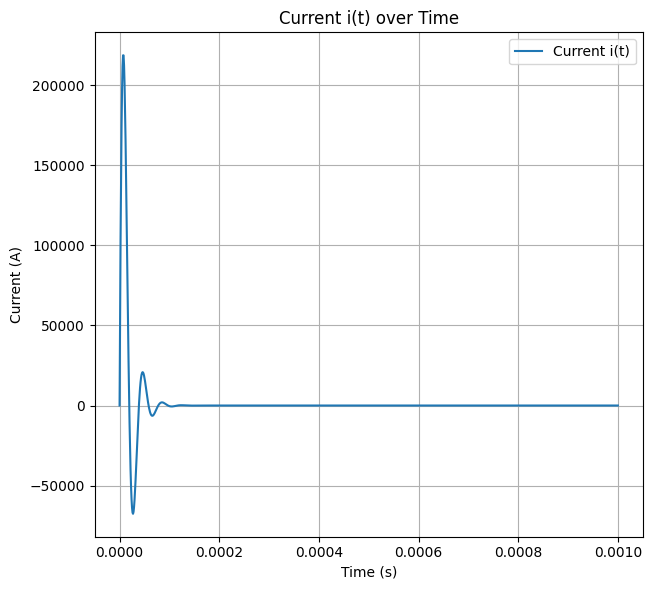

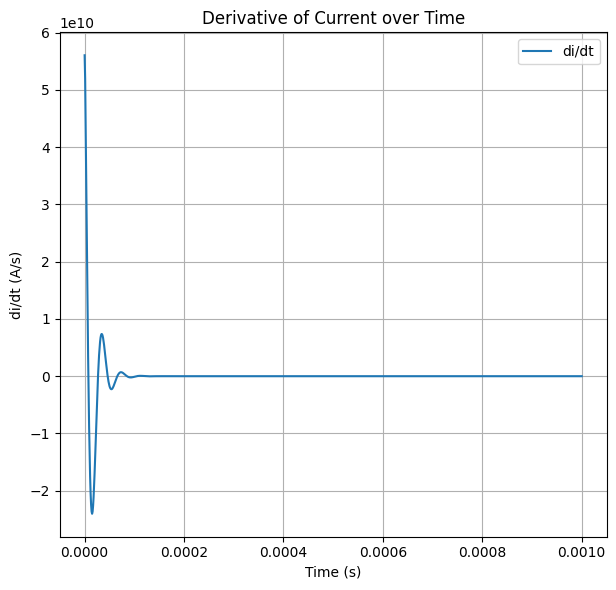

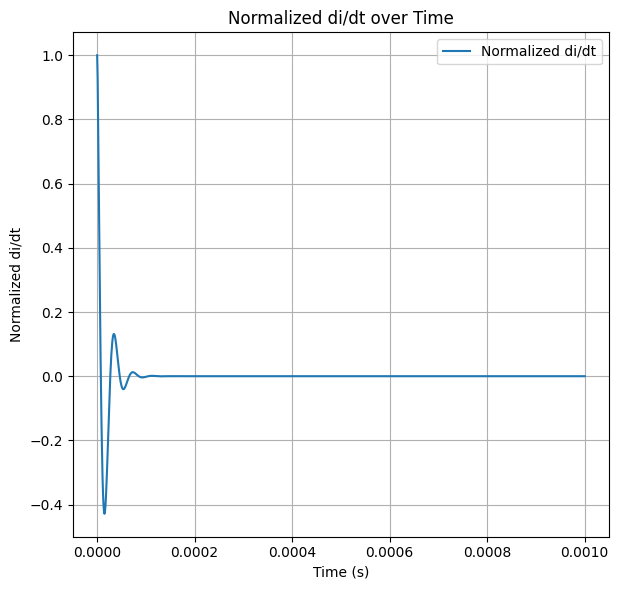

'./normalized_di_dt.txt'

In [87]:

# Constants
mu_0 = 4 * np.pi * 1e-7  # permeability of free space in H/m
mu_r = 1  # relative permeability (for air or vacuum)

V = 400  # voltage in volts
C = 5e-3  # capacitance in farads(F)

coil_inner_diameter_mm = 5  # inner diameter of the coil in cm
R_coil = (coil_inner_diameter_mm / 2) * 1e-3  # coil radius in meters

wire_diameter_awg = 0.6437  # diameter of 22 AWG wire in mm
wire_radius_m = (wire_diameter_awg / 2) * 1e-3  # wire radius in meters
rho_copper = 1.68e-8  # resistivity of copper in ohm-meters

# Calculating Inductance L and Resistance R
length_wire = 2 * np.pi * R_coil  # length of the wire in meters
cross_sectional_area = np.pi * (wire_radius_m**2)  # cross-sectional area in m^2
L = mu_0 * mu_r * R_coil * (np.log(8 * R_coil / wire_radius_m) - 2)  # Inductance in Henries

R = rho_copper * length_wire / cross_sectional_area  # Resistance in Ohms
# R = 0.0081

# Differential equation for the RLC circuit
def rlc_circuit(t, I, L, R, V, C):
    i, q = I  # i(t) and q(t) are the current and charge on the capacitor respectively
    di_dt = (V - R*i - q/C) / L
    dq_dt = i
    return [di_dt, dq_dt]


# def rlc_circuit(t, I, L, R, V,C):
#     i, di_dt = I
#     d2i_dt2 = (V - R*di_dt - i/L) / C
#     return [di_dt, d2i_dt2]

# Initial conditions
initial_conditions = [0, 0]  # i(0) = 0 A, q(0) = 0 C (uncharged capacitor)

# Time span for the solution in seconds
t_span = (0, 0.001)
t_eval = np.linspace(*t_span, 1000)  # 200 Samples collected till eval from 0 to 0.01 s 

# Solve the differential equation
sol = solve_ivp(rlc_circuit, t_span, initial_conditions, args=(L, R, V, C), t_eval=t_eval, method='RK45')

# Compute di/dt and the normalized di/dt
di_dt = np.gradient(sol.y[0], sol.t)

di_dt_max = np.max(np.abs(di_dt))

print(sol)

print(di_dt)

print("di_dt_max  :" )

print(di_dt_max)

normalized_di_dt = di_dt / di_dt_max


print(normalized_di_dt)

# Exporting the normalized di/dt values to a text file
normalized_di_dt_filepath = './normalized_di_dt.txt'
np.savetxt(normalized_di_dt_filepath, normalized_di_dt)

# Plotting the current i(t), its derivative di/dt, and normalized di/dt
plt.figure(figsize=(18, 6))

# Current i(t)
plt.subplot(1, 3, 1)
plt.plot(sol.t, sol.y[0], label='Current i(t)')
plt.title('Current i(t) over Time')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Derivative of current di/dt
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 2)
plt.plot(sol.t, di_dt, label='di/dt')
plt.title('Derivative of Current over Time')
plt.xlabel('Time (s)')
plt.ylabel('di/dt (A/s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Normalized derivative of current normalized di/dt
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 3)
plt.plot(sol.t, normalized_di_dt, label='Normalized di/dt')
plt.title('Normalized di/dt over Time')
plt.xlabel('Time (s)')
plt.ylabel('Normalized di/dt')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Return the file path of the exported data
normalized_di_dt_filepath


# %%


In [ ]:
########################################################################################


6.688249719527975e-09
0.0008101539292465569
-26235013943.81421
-26235013943.81421
i_t:: [ 0.00000000e+00  5.60980827e+04  1.04211340e+05  1.43897290e+05
  1.75001185e+05  1.97627513e+05  2.12107448e+05  2.18963650e+05
  2.18873684e+05  2.12633263e+05  2.01120354e+05  1.85261080e+05
  1.65998146e+05  1.44262417e+05  1.20948065e+05  9.68915896e+04
  7.28548623e+04  4.95121996e+04  2.74413823e+04  7.11841550e+03
 -1.10842477e+04 -2.68963658e+04 -4.01458434e+04 -5.07523685e+04
 -5.87191922e+04 -6.41234949e+04 -6.71057723e+04 -6.78586509e+04
 -6.66155129e+04 -6.36392734e+04 -5.92116078e+04 -5.36228811e+04
 -4.71629824e+04 -4.01132198e+04 -3.27393822e+04 -2.52860300e+04
 -1.79720356e+04 -1.09873558e+04 -4.49098716e+03  1.38997439e+03
  6.56026795e+03  1.09555139e+04  1.45404996e+04  1.73068403e+04
  1.92701511e+04  2.04668676e+04  2.09508421e+04  2.07898398e+04
  2.00620419e+04  1.88526562e+04  1.72507159e+04  1.53461373e+04
  1.32270873e+04  1.09777021e+04  8.67617896e+03  6.39325350e+03
  

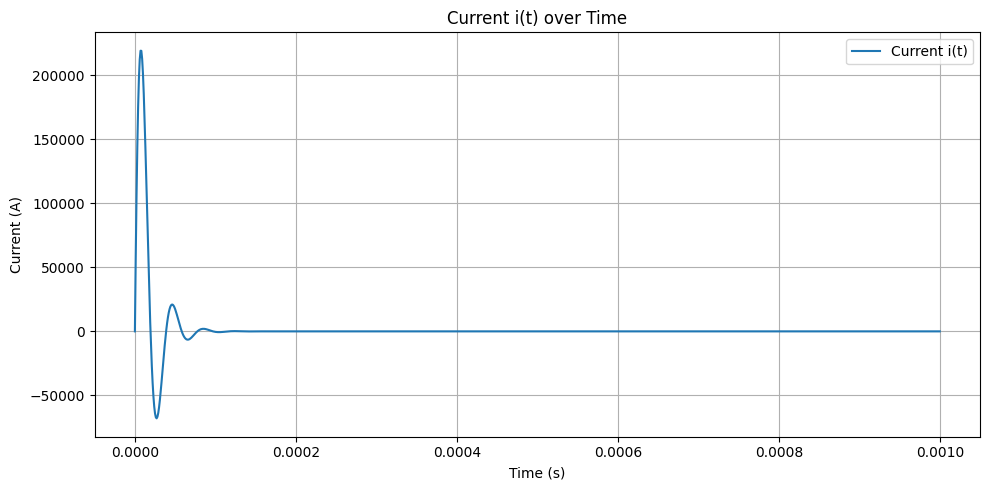

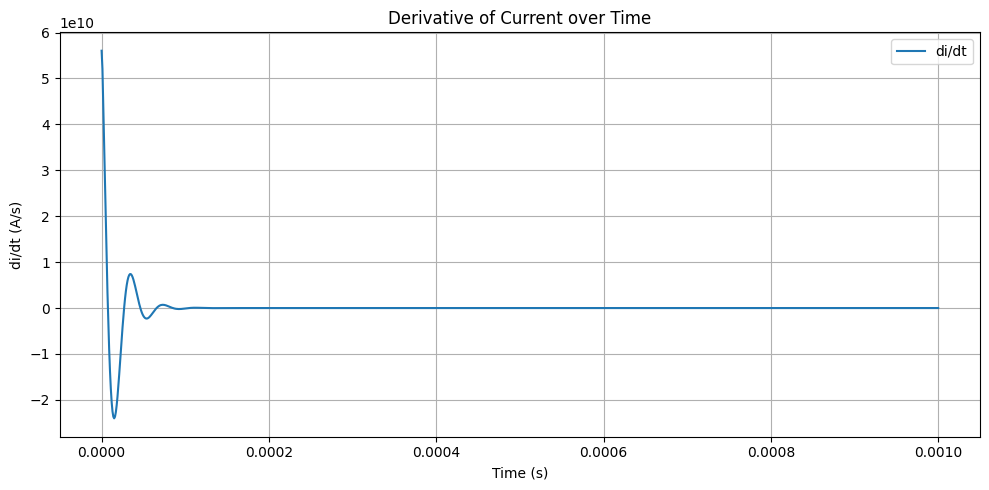

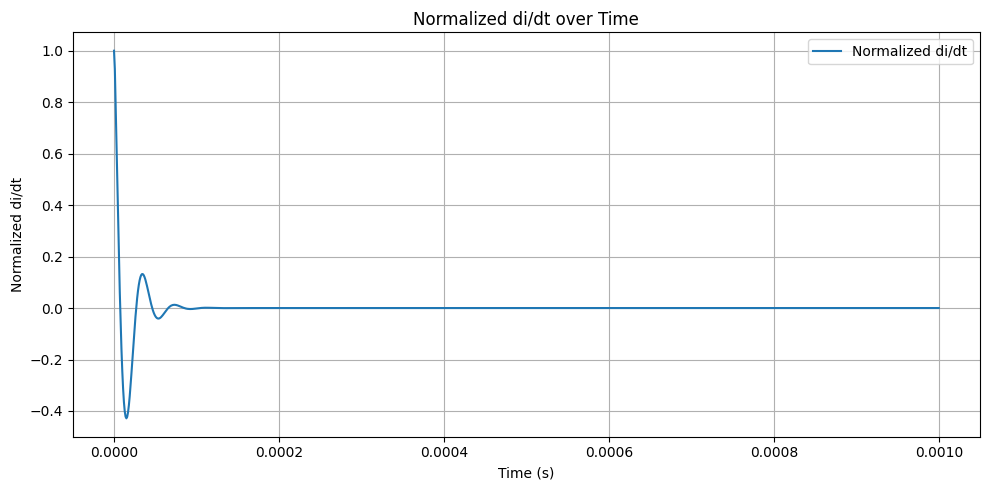

'./normalized_di_dt.txt'

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
mu_0 = 4 * np.pi * 1e-7  # permeability of free space in H/m
V0 = 400  # initial voltage in volts (used as a constant factor for the current)
C = 5e-3  # capacitance in farads(F)



# Parameters for the coil, assuming a simple circular loop
coil_inner_diameter_mm = 5  # inner diameter of the coil in cm

R_coil = (coil_inner_diameter_mm / 2) * 1e-3  # coil radius in meters

wire_diameter_awg = 0.644  # diameter of 22 AWG wire in mm

wire_radius_m = (wire_diameter_awg / 2) * 1e-3  # wire radius in meters


rho_copper = 1.68e-8  # resistivity of copper in ohm-meters



# Calculating Inductance L and Resistance R

length_wire = 2 * np.pi * R_coil  # length of the wire in meters

cross_sectional_area = np.pi * (wire_radius_m**2)  # cross-sectional area in m^2

L = mu_0 * R_coil * (np.log(8 * R_coil / wire_radius_m) - 2)  # Inductance in Henries

R = rho_copper * length_wire / cross_sectional_area     # Resistance in Ohms

# R = 0.0000089

# R = 0.000089

print(L)
print(R)





# Time span for the solution in seconds
t_span = np.linspace(0, 0.001, 1000)



# # Calculate angular frequencies for the underdamped case
# omega_1 = R / (2 * L)
# omega_d = np.sqrt(1 / (L * C) - omega_1**2)

# # For discriminant > 0, use the overdamped equation; otherwise, use underdamped
# discriminant = omega_1**2 - 1 / (L * C)



# if discriminant > 0:
#     # Overdamped response (not likely the case we want)
#     i_t = V0 * np.exp(-omega_1 * t_span) * (np.cosh(omega_d * t_span) + (omega_1 / omega_d) * np.sinh(omega_d * t_span))
# else:
    
#     # Underdamped response (likely the case we want based on the plot)
#     i_t = V0 * np.exp(-omega_1 * t_span) * (np.cos(omega_d * t_span) + (omega_1 / omega_d) * np.sin(omega_d * t_span))





# Calculate ω1 and ω2 for the overdamped case
omega_1 = R / (2 * L)
omega_2 = np.sqrt(np.abs((R / (2 * L))**2 - 1 / (L * C)))

# Calculate i(t) for overdamped or underdamped case based on the discriminant
discriminant = (R / (2 * L))**2 - 1 / (L * C)
print(discriminant)

# For discriminant > 0, use the overdamped equation; otherwise, use underdamped
if discriminant > 0:
    i_t = V0 * C * omega_2 * np.exp(-omega_1 * t_span) * (((omega_1 / omega_2)**2) - 1) * np.sinh(omega_2 * t_span)
else:
    i_t = V0 * C * omega_2 * np.exp(-omega_1 * t_span) * (((omega_1 / omega_2)**2) + 1) * np.sin(omega_2 * t_span)








print(discriminant)

print(f"i_t:: {i_t}")
# Compute di/dt
di_dt = np.gradient(i_t, t_span)

# Normalize di/dt
di_dt_max = np.max(np.abs(di_dt))

print(di_dt_max)


normalized_di_dt = di_dt / di_dt_max

# Exporting the normalized di/dt values to a text file
normalized_di_dt_filepath = './normalized_di_dt.txt'
np.savetxt(normalized_di_dt_filepath, normalized_di_dt)



# Plotting the current i(t)
plt.figure(figsize=(10, 5))
plt.plot(t_span, i_t, label='Current i(t)')
plt.title('Current i(t) over Time')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Derivative of current di/dt
plt.figure(figsize=(10, 5))
plt.plot(t_span, di_dt, label='di/dt')
plt.title('Derivative of Current over Time')
plt.xlabel('Time (s)')
plt.ylabel('di/dt (A/s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Normalized derivative of current normalized di/dt
plt.figure(figsize=(10, 5))
plt.plot(t_span, normalized_di_dt, label='Normalized di/dt')
plt.title('Normalized di/dt over Time')
plt.xlabel('Time (s)')
plt.ylabel('Normalized di/dt')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Return the file path of the exported data
normalized_di_dt_filepath






In [ ]:
######  Electric Field

In [110]:
# ###########   EARLIER CODE #####

# # Correcting the function definitions and variable setups

# # Constants
# mu_0 = 4 * np.pi * 1e-7
# R_coil = 0.0025  # Coil radius in meters
# z_distance = 0.0005  # Distance from the coil along z-axis in meters

# # Magnetic field calculation for a coil along the z-axis at point z
# def magnetic_field_z(I, R, z):
#     return mu_0 / 2 * R**2 * I / (z**2 + R**2)**(1.5)

# # Electric field calculation: E_x = -d(B_z)/dt
# def electric_field_x(B_z, t_eval):
#     E_x = -np.gradient(B_z, t_eval)
#     return E_x

# # Calculate B_z over time using the current from Part A
# B_z_t = np.array([magnetic_field_z(i, R_coil, z_distance) for i in sol.y[0]])

# # Calculate E_x
# E_x = electric_field_x(B_z_t, sol.t)

# # Calculate dE_x/dx numerically
# dEx_dx = np.gradient(E_x, sol.t)

# # Plotting the results
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.plot(sol.t, E_x, label='Electric Field $E_x(t)$')
# plt.title('Electric Field $E_x$ Over Time')
# plt.xlabel('Time (s)')
# plt.ylabel('Electric Field $E_x$ (V/m)')
# plt.grid(True)
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(sol.t, dEx_dx, label='Gradient of Electric Field $dE_x/dx$')
# plt.title('Gradient of Electric Field $E_x$ Over Time')
# plt.xlabel('Time (s)')
# plt.ylabel('Gradient $dE_x/dx$ (V/m²)')
# plt.grid(True)
# plt.legend()

# plt.tight_layout()
# plt.show()


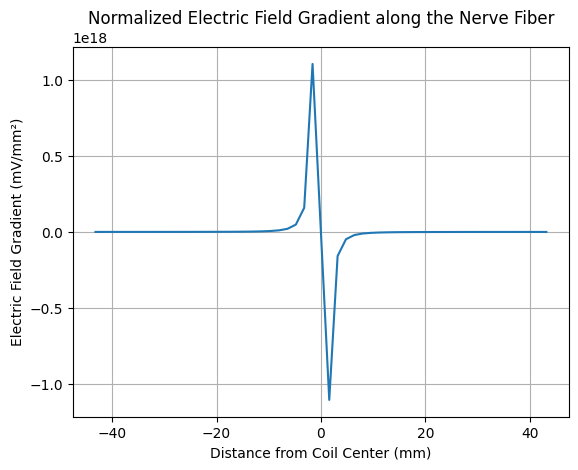

'normalized_dEx_dx.txt'

In [101]:
import numpy as np

# Retrieve the maximum normalized di/dt from Part A
max_di_dt_index = np.argmax(np.abs(di_dt))
max_di_dt = di_dt[max_di_dt_index]

# Calculate the magnetic field Bz at the position of the nerve fiber above the coil center
# Assuming the nerve fiber is placed at a distance of z = 0.5 mm from the coil in the center
z = 0.5e-3  # 0.5 mm in meters

B_z_max = mu_0 * R_coil**2 * max_di_dt / (2 * (R_coil**2 + z**2)**(3/2))

# Use Faraday's law to calculate the induced electric field
# The electric field E_x is the rate of change of B_z with time
E_x_max = -B_z_max  # Simplified for this context, as E_x = -dB/dt

# Calculate the electric field gradient dE_x/dx along the nerve fiber at different nodes
# We will assume a linear decay of E_x along the x-axis, which is a simplification
# node_distances = np.linspace(-0.1, 0.1, 55)  # Example positions of 55 nodes in meters



# nerve_length_mm = 88  # Nerve length in mm
# node_distances = np.linspace(-nerve_length_mm/2, nerve_length_mm/2, 55)


# Number of nodes
num_nodes = 55

# Distance between nodes in mm
distance_between_nodes_mm = 1.6

# Calculate the total length covered by the nodes
total_length_mm = num_nodes * distance_between_nodes_mm

# Calculate the positions of the nodes, centered around the middle of the nerve
# The first node is at -total_length_mm/2 + distance_between_nodes_mm/2
# The last node is at total_length_mm/2 - distance_between_nodes_mm/2
node_positions_mm = np.linspace(-total_length_mm / 2 + distance_between_nodes_mm / 2,
                                total_length_mm / 2 - distance_between_nodes_mm / 2,
                                num_nodes)

# Convert positions from mm to meters for calculations
node_distances = node_positions_mm / 1e3



dE_x_dx = np.array([-E_x_max * 2 * x / (x**2 + z**2)**2 for x in node_distances])

# Normalize the electric field gradient to mV/mm^2
dE_x_dx_mVmm2 = dE_x_dx * 1e6  # Convert V/m^2 to mV/mm^2




# Exporting the normalized dE_x/dx values to a text file
dE_x_dx_filepath = 'normalized_dEx_dx.txt'
np.savetxt(dE_x_dx_filepath, dE_x_dx_mVmm2)

# Plot the normalized dE_x/dx along the nerve fiber
plt.plot(node_distances * 1e3, dE_x_dx_mVmm2)  # Convert distances to mm for plotting
plt.title('Normalized Electric Field Gradient along the Nerve Fiber')
plt.xlabel('Distance from Coil Center (mm)')
plt.ylabel('Electric Field Gradient (mV/mm²)')
plt.grid(True)
plt.show()

# Return the file path of the exported data
dE_x_dx_filepath


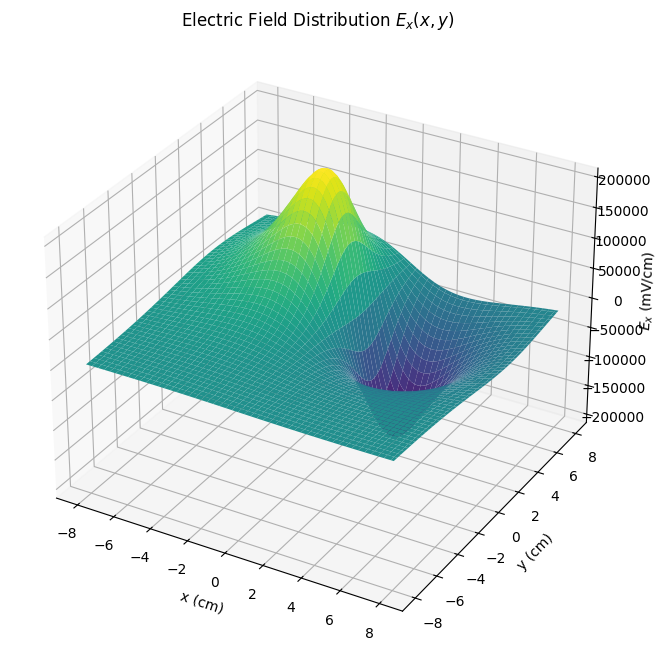

In [102]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Use the maximum di/dt value from Part A for the electric field calculation
# # This is a simplification; the field depends on the specifics of your coil configuration
# E_x_max = dE_x_dx  # Placeholder for the maximum electric field in mV/cm

# # Define the x and y grid for the plot
# x = np.linspace(-8e-2, 8e-2, 100)  # Convert cm to meters
# y = np.linspace(-8e-2, 8e-2, 100)
# X, Y = np.meshgrid(x, y)

# # Calculate the electric field distribution as a function of x and y
# # Assuming a symmetrical pattern around the coil, like a dipole field
# R = np.sqrt(X**2 + Y**2)  # Radial distance from the coil's center
# # E_x = E_x_max * np.exp(-R**2 * 1e4) * (2 * R**2 * 1e4 - 1)  # A Gaussian-like distribution

# # Create a 3D plot
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Plot the surface
# ax.plot_surface(X * 1e2, Y * 1e2, E_x, cmap='viridis', edgecolor='none')

# # Set plot labels and titles
# ax.set_title('Electric Field Distribution $E_x(x, y)$')
# ax.set_xlabel('x (cm)')
# ax.set_ylabel('y (cm)')
# ax.set_zlabel('$E_x$ (mV/cm)')

# # Show the plot
# plt.show()


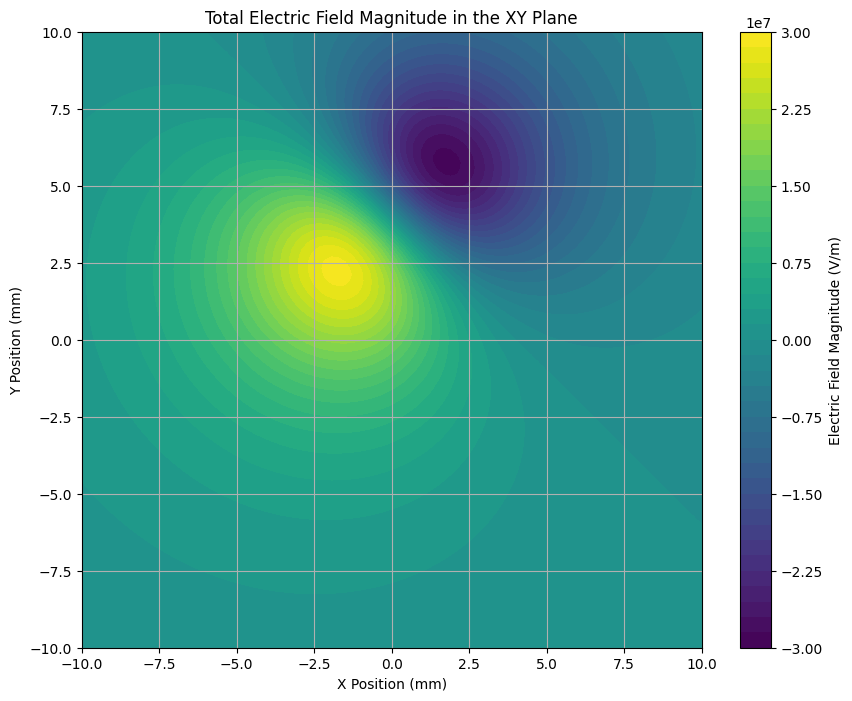

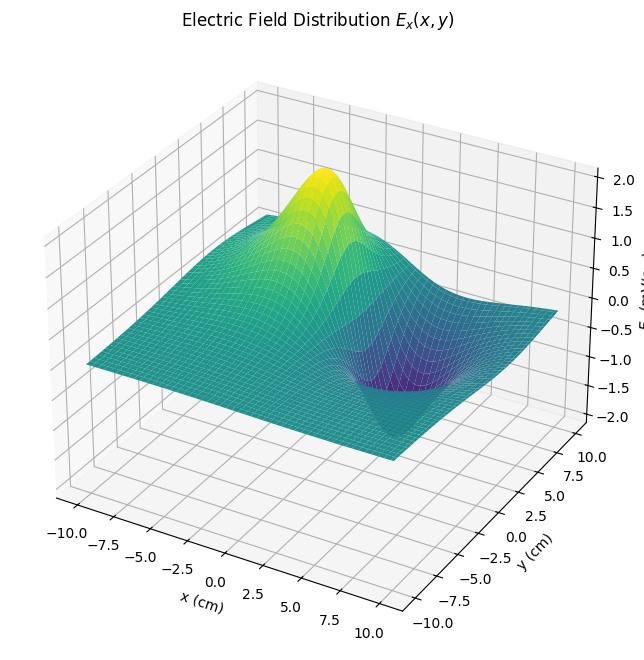

In [105]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Constants
# mu_0 = 4 * np.pi * 1e-7  # Permeability of free space (H/m)
# N = 30                   # Number of turns in the coil
# R_coil = 0.0025          # Radius of the coil in meters (2.5 mm)
# z = 0.005                # Distance from coil to nerve in meters (5 mm)
# y_offset = 0.004         # Offset in y-direction in meters (4 mm)

# # Maximum rate of change of current obtained from your calculations
# max_di_dt = 1000000  # Example value in A/s, replace with your actual value

# # Position grids in the XY plane
# x_range = np.linspace(-0.01, 0.01, 100)  # X positions in meters
# y_range = np.linspace(-0.01, 0.01, 100)  # Y positions in meters

# # Create mesh grids for X and Y positions
# X, Y = np.meshgrid(x_range, y_range)




# # Calculate the distances from each point in the grid to the coil center in 3D space
# R = np.sqrt(X**2 + (Y - y_offset)**2 + z**2)

# # Calculate components of the electric field
# E_x = (-mu_0 * N * max_di_dt / (4 * np.pi)) * (3 * X * z / R**5)
# E_y = (-mu_0 * N * max_di_dt / (4 * np.pi)) * (3 * (Y - y_offset) * z / R**5)

# # Calculate the magnitude of the total electric field
# # E_total = np.sqrt(E_x**2 + E_y**2)
# E_total = E_x + E_y

# # Plotting
# plt.figure(figsize=(10, 8))
# cp = plt.contourf(X * 1e3, Y * 1e3, E_total, levels=50, cmap='viridis')  # Convert meters to mm for axis labels
# plt.colorbar(cp, label='Electric Field Magnitude (V/m)')
# plt.title('Total Electric Field Magnitude in the XY Plane')
# plt.xlabel('X Position (mm)')
# plt.ylabel('Y Position (mm)')
# plt.grid(True)
# plt.show()




# # Create a 3D plot
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Plot the surface
# ax.plot_surface(X * 1e3, Y * 1e3, E_x, cmap='viridis', edgecolor='none')

# # Set plot labels and titles
# ax.set_title('Electric Field Distribution $E_x(x, y)$')
# ax.set_xlabel('x (cm)')
# ax.set_ylabel('y (cm)')
# ax.set_zlabel('$E_x$ (mV/cm)')

# # Show the plot
# plt.show()


In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
mu_0 = 4 * np.pi * 1e-7  # permeability of free space in H/m
N = 1  # number of turns in the coil


# dt = 0.01  # time step in seconds


# Constants
R_coil = 0.0025          # Radius of the coil in meters (2.5 mm)
z = 0.005                # Distance from coil to nerve in meters (5 mm)
y_offset = 0.004         # Offset in y-direction in meters (4 mm)



# Calculate dI(t)/dt for the max value of di/dt
di_dt_max = np.max(di_dt)


# Define the position where electric field is calculated (r)
# # Position grids in the XY plane

x = np.linspace(-0.01, 0.01, 100)  # range of x-axis (m)
y = np.linspace(-0.01, 0.01, 100)  # range of y-axis (m)

# # Create mesh grids for X and Y positions
X, Y = np.meshgrid(x, y)  # create meshgrid for 2D plane




###############################################################################################################

# Calculate electric field Ex along the XY plane
Ex = np.zeros_like(X)


for i in range(len(x)):
    
    for j in range(len(y)):
        
        r = np.array([x[i], y[j], 0])  # position where electric field is calculated
        
        dl = np.array([0, 2 * np.pi * R_coil, 0])  # differential element of the coil
        
        r_prime = np.array([0, R_coil * np.cos(np.pi / 4), R_coil * np.sin(np.pi / 4)])  # position of dl element
      
        r_diff = np.linalg.norm(r - r_prime)  # distance between r and r_prime
        
        Ex[i, j] = (di_dt * (4 * np.pi * mu_0)) * (1 / r_diff)
        
        
        
        

# Calculate electric field gradient dEx/dx
dEx_dx = np.gradient(Ex, axis=0) / np.gradient(x)



# Plot electric field Ex
plt.figure(figsize=(10, 5))
plt.contourf(X, Y, Ex, cmap='viridis')
plt.colorbar(label='Electric Field (V/m)')
plt.title('Electric Field (Ex component) in XY Plane')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot electric field gradient dEx/dx
plt.figure(figsize=(10, 5))
plt.contourf(X, Y, dEx_dx, cmap='viridis')
plt.colorbar(label='Electric Field Gradient (mV/mm^2)')
plt.title('Electric Field Gradient (dEx/dx) in XY Plane')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.tight_layout()
plt.show()



# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X * 1e2, Y * 1e2, Ex, cmap='viridis', edgecolor='none')

# Set plot labels and titles
ax.set_title('Electric Field Distribution $E_x(x, y)$')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_zlabel('$E_x$ (mV/cm)')

# Show the plot
plt.show()

ValueError: setting an array element with a sequence.

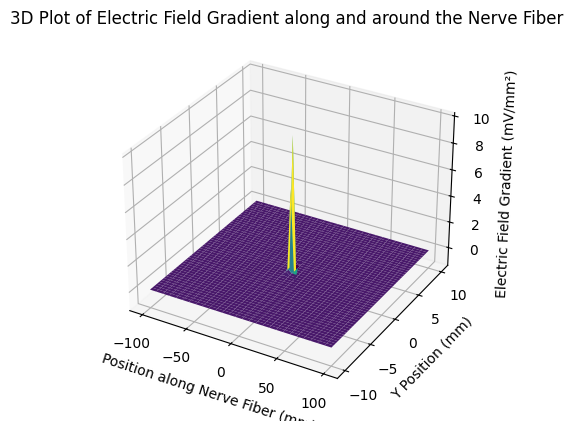

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
mu_0 = 4 * np.pi * 1e-7  # Permeability of free space
N = 1  # Number of turns in the coil
di_dt_max = np.max(di_dt)  # Maximum derivative of the current, example value



# Coil definition
coil_radius = 0.05*1e-3  # Radius in meters

num_points = 100  # Number of points discretizing the coil

theta = np.linspace(0, 2 * np.pi, num_points)
coil_x = coil_radius * np.cos(theta)
coil_y = coil_radius * np.sin(theta)

dl = 2 * np.pi * coil_radius / num_points  # Length of each coil segment



#####

# Constants
mu_0 = 4 * np.pi * 1e-7  # permeability of free space in H/m
N = 1  # number of turns in the coil


# dt = 0.01  # time step in seconds


# Constants
R_coil = 0.0025          # Radius of the coil in meters (2.5 mm)
z = 0.005                # Distance from coil to nerve in meters (5 mm)
y_offset = 0.004         # Offset in y-direction in meters (4 mm)

# # Maximum rate of change of current obtained from your calculations
# max_di_dt = 1000000  # Example value in A/s, replace with your actual value

# # Position grids in the XY plane
# x_range = np.linspace(-0.01, 0.01, 100)  # X positions in meters
# y_range = np.linspace(-0.01, 0.01, 100)  # Y positions in meters

# # Create mesh grids for X and Y positions
# X, Y = np.meshgrid(x_range, y_range)

#####







# Nerve fiber nodes and y-range
num_nodes = 55

node_positions = np.linspace(-0.1, 0.1, num_nodes)  # Along the x-axis




# # Number of nodes
# num_nodes = 55

# # Distance between nodes in mm
# distance_between_nodes_mm = 1.6

# # Calculate the total length covered by the nodes
# total_length_mm = num_nodes * distance_between_nodes_mm

# # Calculate the positions of the nodes, centered around the middle of the nerve
# # The first node is at -total_length_mm/2 + distance_between_nodes_mm/2
# # The last node is at total_length_mm/2 - distance_between_nodes_mm/2
# node_positions_mm = np.linspace(-total_length_mm / 2 + distance_between_nodes_mm / 2,
#                                 total_length_mm / 2 - distance_between_nodes_mm / 2,
#                                 num_nodes)

# # Convert positions from mm to meters for calculations
# node_positions = node_positions_mm / 1e3

# print(node_positions)
# print(len(node_positions))





y_positions = np.linspace(-0.01, 0.01, 50)  # Y-range to analyze around the nerve



# Prepare meshgrid for x and y positions
X, Y = np.meshgrid(node_positions, y_positions)







##########################################################################################################
# Initialize electric field gradient array
dEx_dx = np.zeros_like(X)

# Compute the electric field gradient at each node and y-position
for k in range(num_points):
    
    # Distance from each coil segment to each node, for all y-positions
    r = np.sqrt((X - coil_x[k])**2 + (Y - coil_y[k])**2)
    # Contributions from each segment to the electric field
    dEx = -mu_0 * N * di_dt_max * (X - coil_x[k]) / (4 * np.pi * r**3) * dl
    # Approximate the derivative by finite difference
    if k > 0:
        dEx_dx += (dEx - prev_dEx) / dl
    prev_dEx = dEx



# Convert electric field gradient from V/m^2 to mV/mm^2
dEx_dx_mVmm2 = dEx_dx * 1e6

# Plotting the 3D gradient
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X * 1e3, Y * 1e3, dEx_dx_mVmm2, cmap='viridis')

ax.set_xlabel('Position along Nerve Fiber (mm)')
ax.set_ylabel('Y Position (mm)')
ax.set_zlabel('Electric Field Gradient (mV/mm²)')
ax.set_title('3D Plot of Electric Field Gradient along and around the Nerve Fiber')

plt.show()


